In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import os

Data Path

In [3]:
curr_dir = os.getcwd()
raw_data_dir = 'Rawdata'
raw_data_name = 'Customer Data.csv'
raw_data_path = os.path.join(curr_dir, raw_data_dir, raw_data_name)

print(curr_dir)
print(raw_data_path)

/Users/newsogood/Documents/Workspace/3RD_Year/1ST_Semester/FRA503/Machine_Learning_Project
/Users/newsogood/Documents/Workspace/3RD_Year/1ST_Semester/FRA503/Machine_Learning_Project/Rawdata/Customer Data.csv


In [4]:
raw_data = pd.read_csv(raw_data_path)
raw_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot: xlabel='CREDIT_LIMIT', ylabel='Count'>

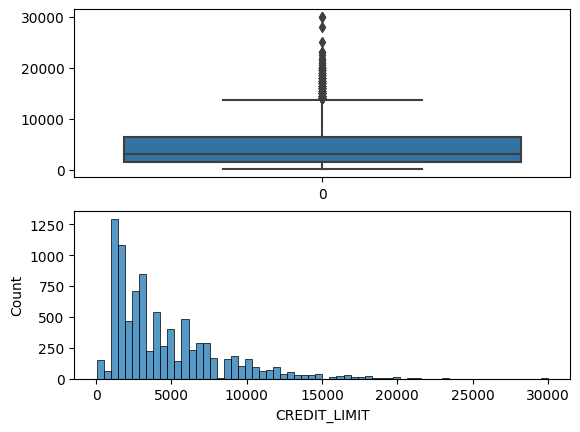

In [5]:
plt1 = plt.subplot(211)
sns.boxplot(raw_data['CREDIT_LIMIT'])
plt2 = plt.subplot(212)
sns.histplot(raw_data['CREDIT_LIMIT'])

<AxesSubplot: xlabel='PURCHASES', ylabel='Count'>

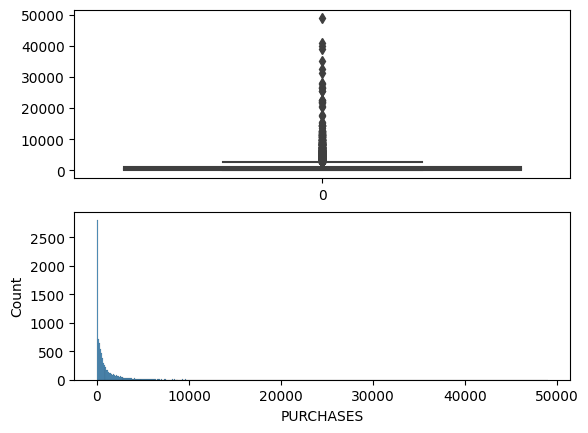

In [6]:
plt1 = plt.subplot(211)
sns.boxplot(raw_data['PURCHASES'])
plt2 = plt.subplot(212)
sns.histplot(raw_data['PURCHASES'])

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics

Function for Machine Learning Process

In [8]:
def k_means_n_cluster_tuner(data, k_cluster=9):
    Num_K = range(2, int(k_cluster)+1)
    silhouette_coef = []
    slope = []
    WCSS = []
    count = 0

    for k in Num_K:
        kmeans = KMeans(n_clusters=k, random_state=1,)
        model = kmeans.fit(data)
        WCSS.append(model.inertia_)
        labels = model.labels_
        silhouette_coef.append(metrics.silhouette_score(data, labels, metric='euclidean'))
        if (count > 1):
            slope.append(abs(model.inertia_ - last_WCSS))
        count += 1
        last_WCSS = model.inertia_
    diff = list(np.array(slope)/max(slope))
    med_sh_coef = np.median(np.array(silhouette_coef))
    mean_wcss = np.mean(np.array(diff))
    for i in diff:
        if ((i < mean_wcss) and (silhouette_coef[Num_K.index(diff.index(i) + 1)] >= med_sh_coef)):
            res = diff.index(i) + 1
            break

    return res, WCSS, silhouette_coef, list(Num_K)

In [9]:
def k_means_model_builder(data, k_cluster=9):
    kmeans = KMeans(n_clusters=k_cluster, random_state=1,)
    model = kmeans.fit(data)
    return model

In [10]:
def create_cluster(model, test, data):
    label = pd.DataFrame(model.predict(test), columns = ["cluster_class"])
    label.describe()
    ct_set = pd.concat([data, label], axis=1)
    return ct_set

In [11]:
def model_result_pairplot(data, label):
    sns.pairplot(data, hue=label)

In [12]:
def model_result_linepolar(data, label):
    plot = pd.melt(data, id_vars=[label])
    fig = px.line_polar(plot, r="value", theta="variable", color=label, line_close=True)
    fig.show()

In [13]:
column = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES"]
test = raw_data[column].copy()

In [14]:
test.isna().sum().sum()

0

In [15]:
test.dropna(inplace=True)
test = test.reindex()

In [16]:
std_test = test.copy()
# std_test = np.sqrt(test).copy()
std_test.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,978.871112,411.067645
std,2081.531879,2136.634782,2097.163877,904.338115
min,0.000000,0.000000,0.000000,0.000000
25%,128.281915,39.635000,0.000000,0.000000
50%,873.385231,361.280000,0.000000,89.000000
75%,2054.140036,1110.130000,1113.821139,468.637500
max,19043.138560,49039.570000,47137.211760,22500.000000


In [17]:
best_n_cluster, wcss_score, sh_coef, k_list = k_means_n_cluster_tuner(std_test)

In [18]:
print(k_list)
print(wcss_score)
print(sh_coef)

[2, 3, 4, 5, 6, 7, 8, 9]
[87231679511.54568, 66066235662.77035, 55385344683.70254, 45784753119.36422, 39672278299.11073, 35134469632.38353, 31320195203.848835, 28451312197.532997]
[0.6063063065213455, 0.6032758024976783, 0.5726832504590815, 0.543330723113595, 0.44495868767067287, 0.44909671442716065, 0.4502402023774543, 0.45217488967981667]


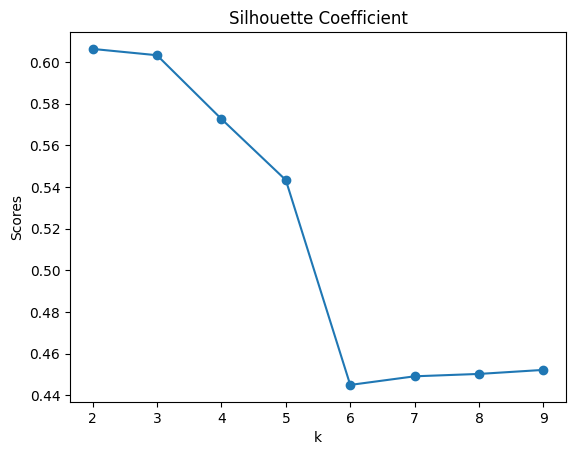

In [19]:
plt.scatter(k_list, sh_coef)
plt.plot(k_list, sh_coef)
plt.title('Silhouette Coefficient')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()

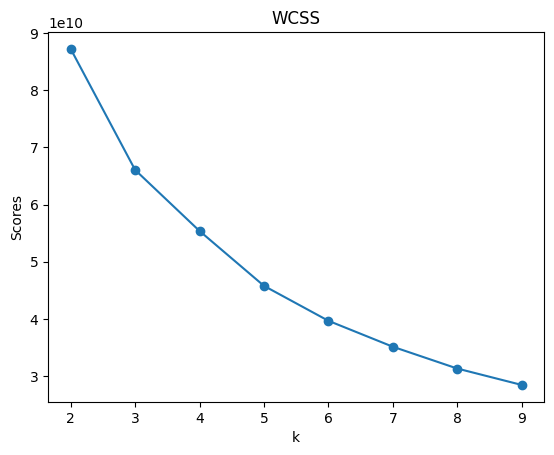

In [20]:
plt.scatter(k_list, wcss_score)
plt.plot(k_list, wcss_score)
plt.title('WCSS')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()

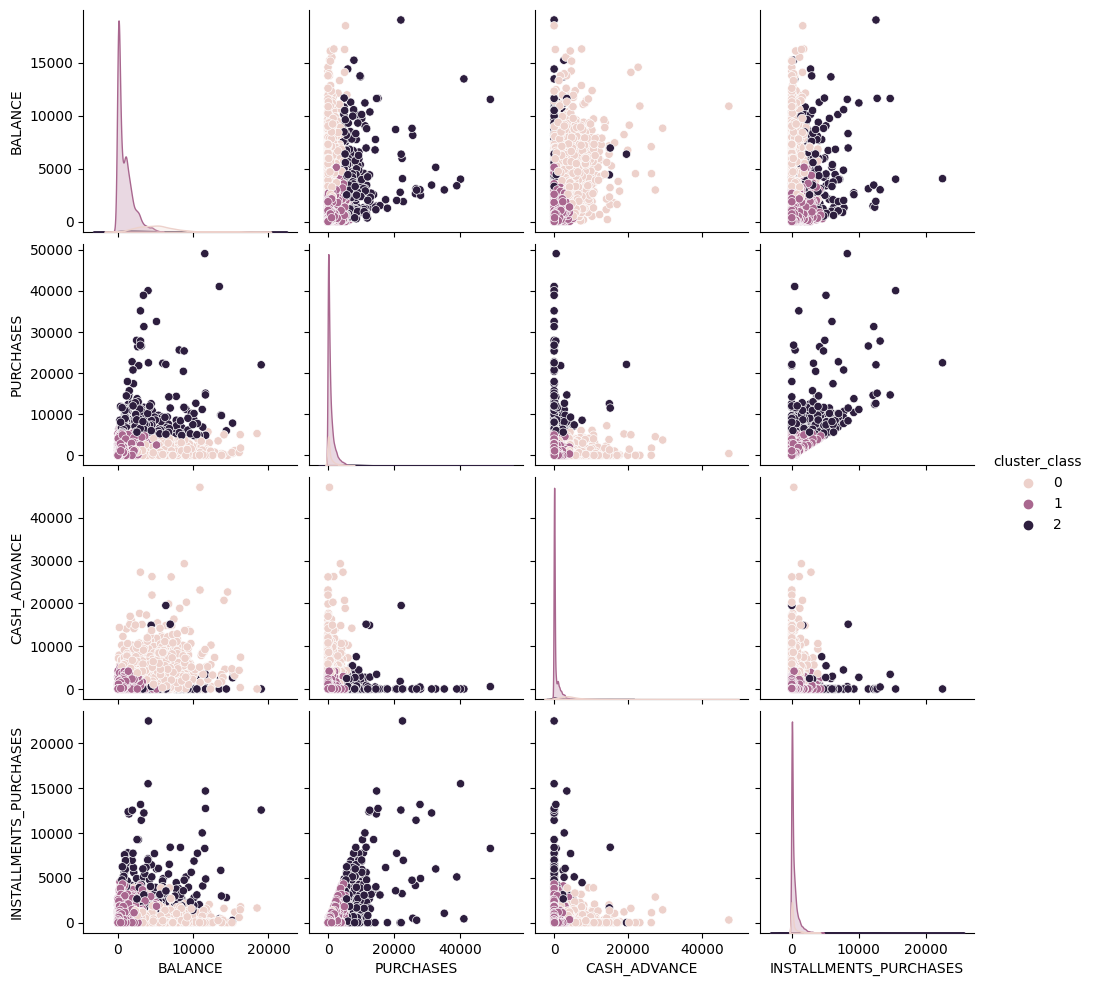

In [21]:
kmeans_model = k_means_model_builder(std_test, 3)
test_cluster = create_cluster(kmeans_model, std_test, std_test)
model_result_pairplot(test_cluster, "cluster_class")

<AxesSubplot: xlabel='cluster_class', ylabel='BALANCE'>

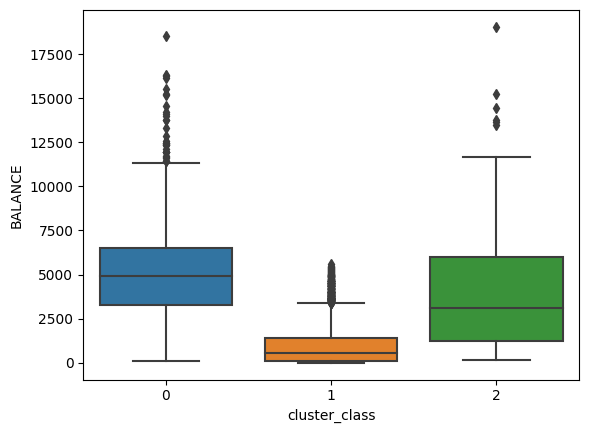

In [30]:
sns.boxplot(data=test_cluster, x='cluster_class', y='BALANCE')

<AxesSubplot: xlabel='cluster_class', ylabel='PURCHASES'>

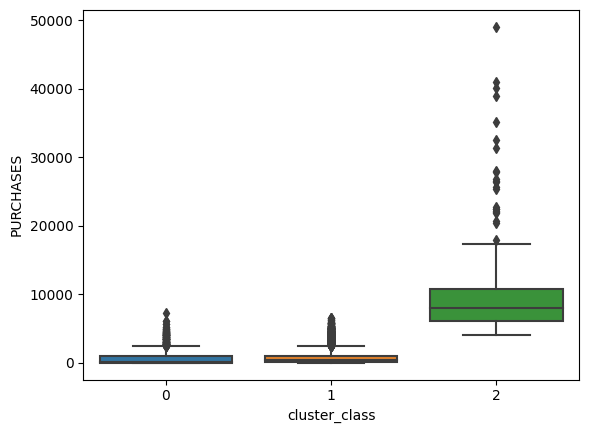

In [31]:
sns.boxplot(data=test_cluster, x='cluster_class', y='PURCHASES')

<AxesSubplot: xlabel='cluster_class', ylabel='CASH_ADVANCE'>

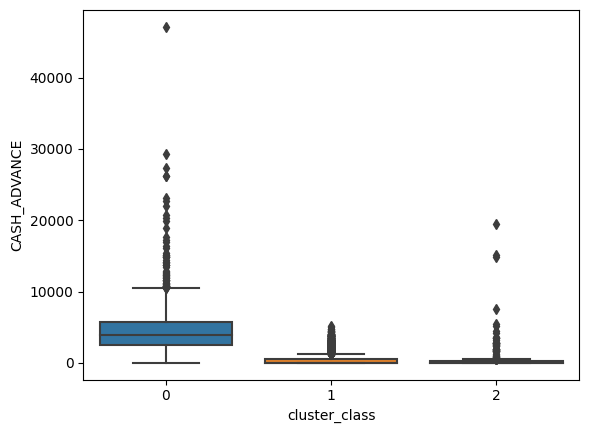

In [32]:
sns.boxplot(data=test_cluster, x='cluster_class', y='CASH_ADVANCE')

<AxesSubplot: xlabel='cluster_class', ylabel='INSTALLMENTS_PURCHASES'>

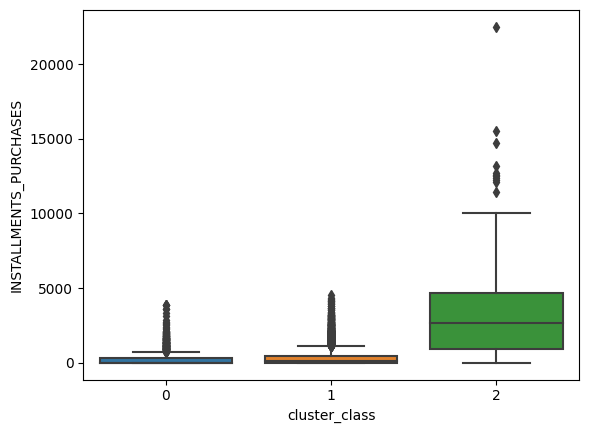

In [33]:
sns.boxplot(data=test_cluster, x='cluster_class', y='INSTALLMENTS_PURCHASES')

In [37]:
behavior_1_cluster = test_cluster[test_cluster["cluster_class"] == 0]
behavior_1_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,cluster_class
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.0
mean,5142.059713,705.293092,4609.522138,274.210826,0.0
std,2581.978916,1130.163977,3651.287780,547.324212,0.0
min,78.114579,0.000000,0.000000,0.000000,0.0
25%,3280.470343,0.000000,2528.397996,0.000000,0.0
50%,4936.913341,160.000000,3904.514452,0.000000,0.0
75%,6510.906764,974.270000,5714.812348,295.600000,0.0
max,18495.558550,7194.530000,47137.211760,3887.000000,0.0


In [176]:
behavior_2_cluster = test_cluster[test_cluster["cluster_class"] == 1]
behavior_2_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,cluster_class
count,7522.000000,7522.000000,7522.000000,7522.000000,7522.0
mean,916.283202,761.826553,415.959114,339.001812,1.0
std,1030.402956,1033.535778,767.262580,551.994216,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,85.413250,57.105000,0.000000,0.000000,1.0
50%,542.044001,360.980000,0.000000,98.200000,1.0
75%,1406.459447,1021.635000,479.811662,450.000000,1.0
max,5588.846272,6598.290000,5104.121726,4538.840000,1.0


In [39]:
behavior_3_cluster = test_cluster[test_cluster["cluster_class"] == 2]
behavior_3_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,cluster_class
count,241.000000,241.000000,241.000000,241.000000,241.0
mean,4174.865489,10004.319627,666.179352,3334.421328,2.0
std,3468.298526,6842.227785,2107.254845,3260.202806,0.0
min,150.952465,3999.920000,0.000000,0.000000,2.0
25%,1229.397644,6091.510000,0.000000,951.340000,2.0
50%,3123.339488,8040.780000,0.000000,2640.500000,2.0
75%,5970.705432,10755.680000,191.331735,4660.100000,2.0
max,19043.138560,49039.570000,19513.474830,22500.000000,2.0


In [129]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [81]:
column = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY"]
test = raw_data[column].copy()

In [82]:
test.isna().sum().sum()

0

In [83]:
test.dropna(inplace=True)
test = test.reindex()

In [84]:
hirach_test = test.copy()
hirach_test.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,978.871112,411.067645,0.135144,0.364437
std,2081.531879,2136.634782,2097.163877,904.338115,0.200121,0.397448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,39.635000,0.000000,0.000000,0.000000,0.000000
50%,873.385231,361.280000,0.000000,89.000000,0.000000,0.166667
75%,2054.140036,1110.130000,1113.821139,468.637500,0.222222,0.750000
max,19043.138560,49039.570000,47137.211760,22500.000000,1.500000,1.000000


In [125]:
hirach_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hirach_net = hirach_model.fit(hirach_test)

In [126]:
print(hirach_net.distances_)

[5.42258107e-02 2.26423971e-01 2.54619661e-01 ... 1.57473785e+05
 2.05162260e+05 2.47662594e+05]


In [174]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

8950


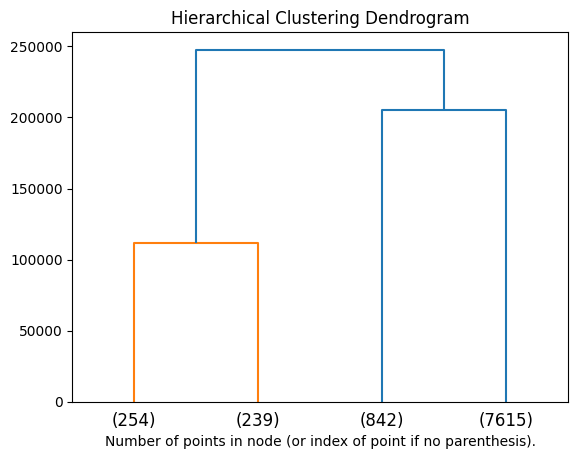

In [175]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hirach_net, truncate_mode="level", p=1)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [163]:
hirach_model = AgglomerativeClustering(n_clusters=4)
hirach_class = pd.DataFrame(hirach_model.fit_predict(hirach_test), columns = ["cluster_class"])

In [164]:
hirach_class.value_counts()

cluster_class
3                5980
2                1635
0                 842
1                 493
dtype: int64

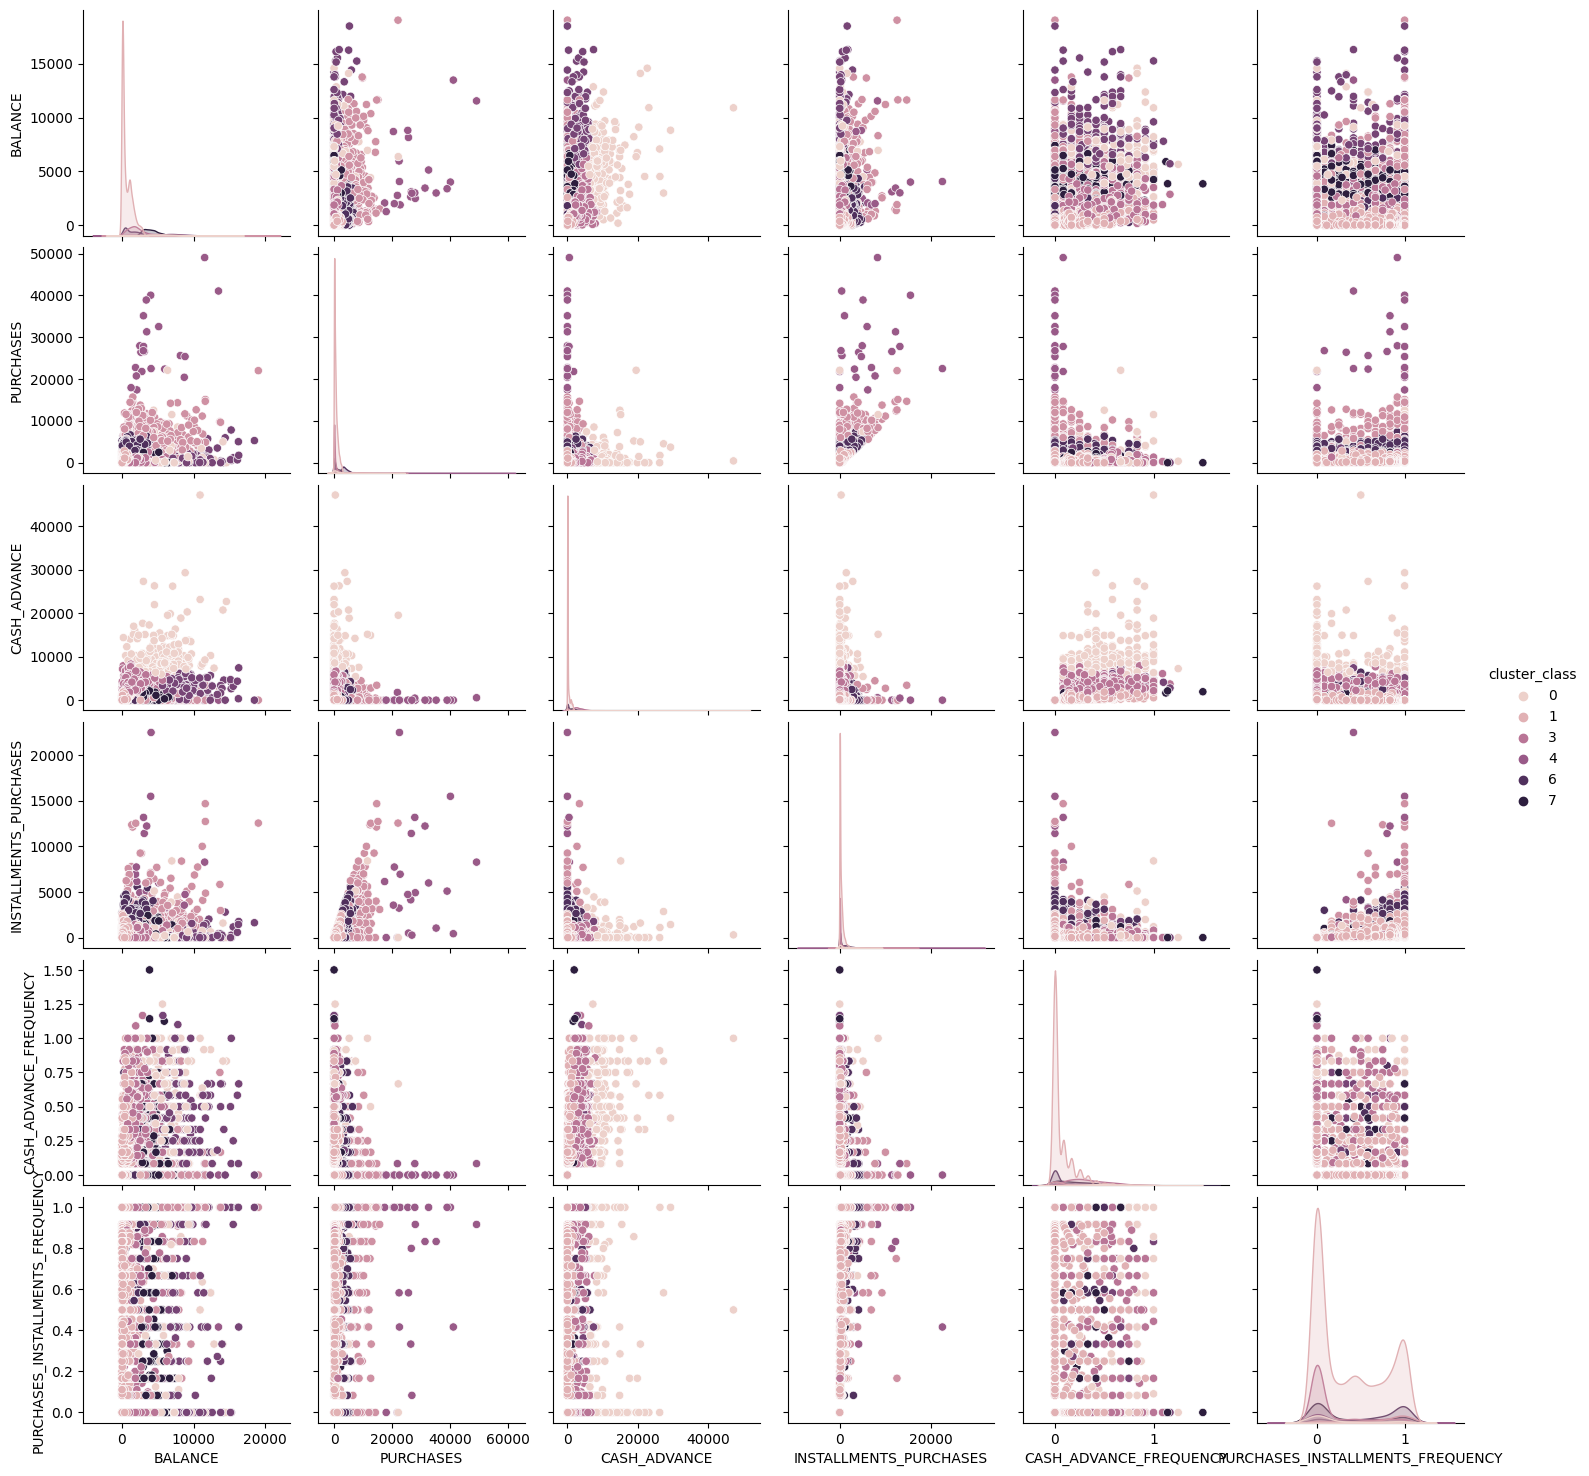

In [145]:
hirach_cluster = pd.concat([hirach_test, hirach_class], axis=1)
model_result_pairplot(hirach_cluster, "cluster_class")

In [146]:
behavior_1_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 0]
behavior_1_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.0
mean,5558.230154,1019.654477,9912.577108,382.471841,0.532569,0.239971,0.0
std,2438.392816,2277.354432,4720.982621,937.764904,0.247460,0.363975,0.0
min,198.035504,0.000000,5192.290154,0.000000,0.083333,0.000000,0.0
25%,3825.264183,0.000000,7203.819540,0.000000,0.333333,0.000000,0.0
50%,5311.877259,169.670000,8641.998958,0.000000,0.500000,0.000000,0.0
75%,7016.254579,989.885000,10672.097810,309.930000,0.727273,0.416667,0.0
max,14581.459140,22101.780000,47137.211760,8409.930000,1.250000,1.000000,0.0


In [147]:
behavior_2_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 1]
behavior_2_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.0
mean,639.566816,552.191204,214.263696,275.534540,0.070782,0.368607,1.0
std,718.219638,622.352694,409.758626,413.423823,0.129385,0.389740,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,54.684894,70.770000,0.000000,0.000000,0.000000,0.000000,1.0
50%,307.018382,332.770000,0.000000,99.930000,0.000000,0.250000,1.0
75%,1089.721495,822.937500,213.534254,396.312500,0.083333,0.750000,1.0
max,3298.236901,2984.340000,2101.740346,2863.920000,1.000000,1.000000,1.0


In [148]:
behavior_3_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 2]
behavior_3_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0
mean,4790.674273,6832.053606,679.796064,2382.295279,0.102540,0.715754,2.0
std,3149.274634,3332.385309,1143.583710,2631.737254,0.180096,0.350048,0.0
min,204.329381,1000.550000,0.000000,0.000000,0.000000,0.000000,2.0
25%,2041.480046,4378.800000,0.000000,560.530000,0.000000,0.500000,2.0
50%,4784.708882,6493.250000,0.000000,1538.440000,0.000000,0.916667,2.0
75%,6743.544354,8834.960000,980.879554,3144.930000,0.166667,1.000000,2.0
max,19043.138560,22009.920000,4843.394482,14686.100000,0.916667,1.000000,2.0


In [149]:
behavior_4_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 3]
behavior_4_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.0
mean,2129.952238,332.731329,3301.127781,133.966183,0.362388,0.147718,3.0
std,1358.550438,583.943301,1305.176328,321.416532,0.213718,0.289784,0.0
min,8.640998,0.000000,1025.434108,0.000000,0.083333,0.000000,3.0
25%,1163.222817,0.000000,2271.460329,0.000000,0.166667,0.000000,3.0
50%,1856.590921,0.000000,2994.309677,0.000000,0.333333,0.000000,3.0
75%,2722.532415,428.000000,4091.737498,65.000000,0.500000,0.083333,3.0
max,6262.211034,3191.000000,8552.910316,2315.040000,1.166667,1.000000,3.0


In [150]:
behavior_5_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 4]
behavior_5_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0
mean,4725.183106,28203.140000,127.230272,6266.850000,0.011364,0.714394,4.0
std,3327.825504,8246.292875,397.301404,5779.172419,0.029271,0.353714,0.0
min,1268.809031,17409.210000,0.000000,0.000000,0.000000,0.000000,4.0
25%,2676.069956,22411.477500,0.000000,1590.560000,0.000000,0.458334,4.0
50%,3250.047941,26492.365000,0.000000,5011.790000,0.000000,0.875000,4.0
75%,5759.267330,32229.672500,0.000000,8143.807500,0.000000,1.000000,4.0
max,13479.288210,49039.570000,1771.824164,22500.000000,0.083333,1.000000,4.0


In [151]:
behavior_6_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 5]
behavior_6_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.0
mean,8131.486256,532.992953,3276.535487,188.797598,0.389887,0.214776,5.0
std,2373.026047,1003.393577,1462.386902,407.259822,0.234898,0.340968,0.0
min,5478.956337,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
25%,6470.644930,0.000000,2411.800947,0.000000,0.250000,0.000000,5.0
50%,7499.480867,137.110000,3250.661190,0.000000,0.333333,0.000000,5.0
75%,8981.879349,672.690000,4269.325043,176.400000,0.580357,0.416667,5.0
max,18495.558550,7823.740000,7424.094447,2796.710000,1.166667,1.000000,5.0


In [152]:
behavior_7_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 6]
behavior_7_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.0
mean,1311.338536,3717.878221,333.593438,1429.504301,0.054624,0.725902,6.0
std,983.158530,1053.302252,903.443673,1084.684845,0.122979,0.340432,0.0
min,12.659909,1635.690000,0.000000,0.000000,0.000000,0.000000,6.0
25%,448.095671,2972.375000,0.000000,616.620000,0.000000,0.500000,6.0
50%,1080.667451,3535.800000,0.000000,1272.810000,0.000000,0.916667,6.0
75%,2007.086614,4381.845000,41.915548,2032.005000,0.083333,1.000000,6.0
max,4348.546906,7387.830000,6419.421654,5580.850000,0.833333,1.000000,6.0


In [153]:
behavior_8_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 7]
behavior_8_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,642.000000,642.000000,642.000000,642.00000,642.000000,642.000000,642.0
mean,3977.243177,716.912181,982.491489,300.00014,0.221442,0.296930,7.0
std,971.891030,836.555333,865.491214,500.39740,0.209642,0.385039,0.0
min,2306.682105,0.000000,0.000000,0.00000,0.000000,0.000000,7.0
25%,3182.239667,0.000000,74.503878,0.00000,0.083333,0.000000,7.0
50%,3861.181892,339.785000,908.292201,0.00000,0.166667,0.000000,7.0
75%,4616.136374,1297.690000,1684.254764,414.57500,0.333333,0.666667,7.0
max,7418.314012,3382.960000,3294.766081,2467.10000,1.500000,1.000000,7.0
